### Execution Steps:
1. Import Libraries
2. Load Data 
3. Build Model
4. Train and Evaluate the Model

### Import Dependencies

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import csv
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16

In [3]:
os.listdir("D:\Data Science\Deep Learning\Intel Image Classification")

['seg_pred', 'seg_test', 'seg_train']

In [4]:
os.listdir("D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
buildings = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\buildings"
street = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\forest"
mountain = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\glacier"
glacier = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\mountain"
sea = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\sea"
forest = r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\street"

In [6]:
print("Number of images in Train Directory: ")

print("Buildings :",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\buildings")))
print("Street: ",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\forest")))
print("Mountain:",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\glacier")))
print("Glacier: ",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\mountain")))
print("Sea: ",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\sea")))
print("Forest: ",len(os.listdir(r"D:\Data Science\Deep Learning\Intel Image Classification\seg_train\seg_train\street")))


Number of images in Train Directory: 
Buildings : 2191
Street:  2271
Mountain: 2404
Glacier:  2512
Sea:  2274
Forest:  2382


### Creating Dataset

In [9]:
x = []
y = []
import cv2
def create_dataset(directory,label_name):
    for i in os.listdir(directory):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(100,100))
        except:
            continue

        x.append(img)
        y.append(label_name)
    return x,y

In [10]:
x,y = create_dataset(buildings,"buildings")
x,y = create_dataset(street,"street")
x,y = create_dataset(mountain,"mountain")
x,y = create_dataset(glacier,"glacier")
x,y = create_dataset(sea,"sea")
x,y = create_dataset(forest,"forest")

In [11]:
x = np.array(x)
y = np.array(y)
print(x.shape,y.shape)

(14034, 100, 100, 3) (14034,)


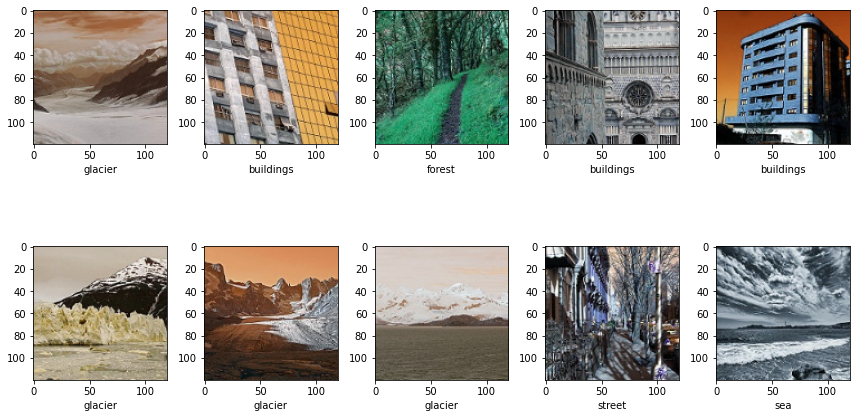

In [10]:
fig =plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x[sample])
    plt.xlabel(y[sample])
    
plt.tight_layout()
plt.show()

In [12]:
unique,counts = np.unique(y,return_counts=True)
print(unique,counts)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street'] [2191 2382 2512 2404 2274 2271]


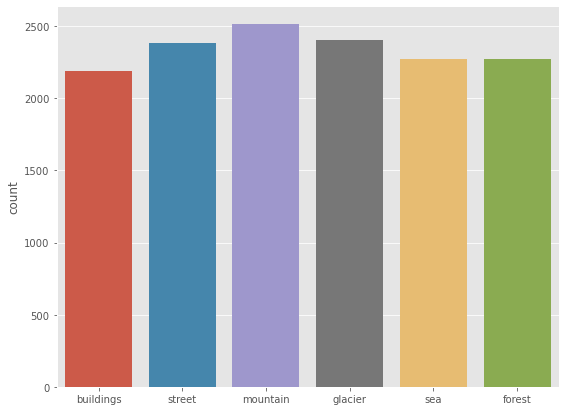

In [12]:
plt.style.use("ggplot")
plt.figure(figsize=(9,7))
sns.countplot(y)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
le = LabelEncoder()
y = le.fit_transform(y)

lb = LabelBinarizer()
y = lb.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
img_size=1
x_train = np.array(X_train)/255.0
x_test = np.array(X_test)/255.0

x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(Y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(Y_test)

### VGG16 Model

In [16]:
vgg= VGG16(weights="imagenet",include_top=False,input_shape = (img_size,img_size,3))

In [17]:
for layer in vgg.layers:
    layer.trainable=False

In [18]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(6,activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 6)                 27654     
                                                                 
Total params: 14,742,342
Trainable params: 27,654
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
checkpoint = ModelCheckpoint("vgg19.h5",monitor = "val_accuracy",save_best_only=True,
                                 save_weights_only = False,verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
history = model.fit(x_train,y_train,batch_size=32,validation_data = (x_test,y_test),
                    epochs=15,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
351/351 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.8080
Epoch 00001: val_accuracy improved from -inf to 0.84111, saving model to vgg19.h5
351/351 [==============================] - 13s 38ms/step - loss: 0.5406 - accuracy: 0.8080 - val_loss: 0.4447 - val_accuracy: 0.8411
Epoch 2/15
350/351 [============================>.] - ETA: 0s - loss: 0.3776 - accuracy: 0.8641
Epoch 00002: val_accuracy improved from 0.84111 to 0.85037, saving model to vgg19.h5
351/351 [==============================] - 12s 34ms/step - loss: 0.3774 - accuracy: 0.8642 - val_loss: 0.4154 - val_accuracy: 0.8504
Epoch 3/15
351/351 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.8831
Epoch 00003: val_accuracy improved from 0.85037 to 0.85216, saving model to vgg19.h5
351/351 [==============================] - 12s 35ms/step - loss: 0.3280 - accuracy: 0.8831 - val_loss: 0.4130 - val_accuracy: 0.8522
Epoch 4/15
350/351 [============================>.] - ETA: 0s

In [24]:
loss,accuracy = model.evaluate(x_test,y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")

88/88 [==============================] - 2s 27ms/step - loss: 0.4394 - accuracy: 0.8518
Loss: 0.43935802578926086
Accuracy: 85.17990708351135


In [25]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict_classes(x_test)
y_pred[:15]

array([0, 1, 1, 4, 3, 2, 2, 0, 0, 1, 0, 2, 1, 4, 3])

In [26]:
y_test_le = np.argmax(y_test,axis=1)
y_test_le[:15]

array([0, 1, 1, 4, 2, 3, 2, 2, 0, 1, 0, 2, 1, 4, 3])

### Model Evaluation

In [27]:
print(classification_report(y_test_le,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       450
           1       0.95      0.96      0.95       408
           2       0.77      0.83      0.80       493
           3       0.82      0.77      0.80       484
           4       0.87      0.85      0.86       480
           5       0.81      0.94      0.87       492

    accuracy                           0.85      2807
   macro avg       0.86      0.85      0.85      2807
weighted avg       0.86      0.85      0.85      2807



### Model Performance

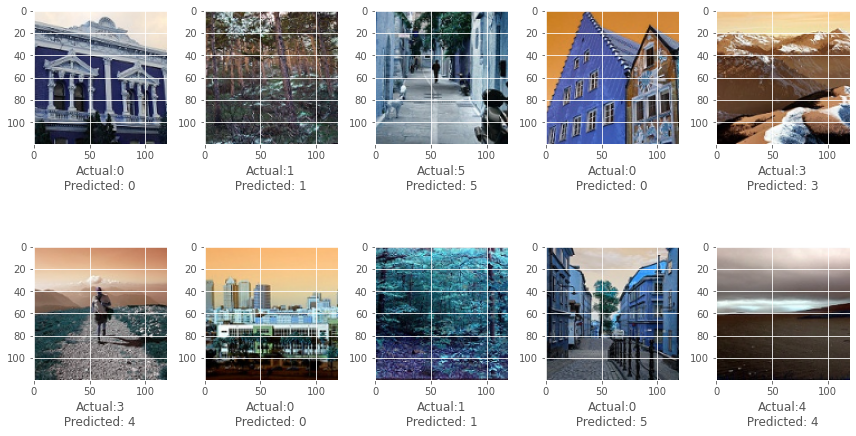

In [32]:
fig =plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual:{y_test_le[sample]}\n Predicted: {y_pred[sample]} ")
    
plt.tight_layout()
plt.show()

## Create a CSV file and write the predictions to it
images=['51.jpg','64.jpg','103.jpg','1360.jpg',
        '328.jpg','1393.jpg','1436.jpg','1451.jpg','1459.jpg','1478.jpg']
with open('predictions.csv', mode='w') as csv_file:
    fieldnames = ['Image name', 'Predicted class label']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(images)):
        writer.writerow({'Image name': images[i], 'Predicted class label': y_pred[i]})

### Observation -->
- The Intel Image Classification CNN project was a machine learning project aimed at developing a Convolutional Neural Network (CNN) model to accurately classify different varieties of places based on their images. The project involved collecting a large dataset of location images and pre-processing them for training and validation. The CNN model was trained using transfer learning techniques. The project demonstrated proficiency in machine learning, deep learning, image processing, and computer vision.
- Preprocessed a large dataset of images and build a pre-trained VGG16 model to achieve an accuracy of over 85% on a test set. 